In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [131]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [132]:
happiness_health = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_건강.xlsx")
happiness_economy = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_경제.xlsx")
happiness_relationship = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_관계 및 사회참여.xlsx")
happiness_education = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_교육.xlsx")
happiness_satisfaction = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_삶의만족도.xlsx")
happiness_safety = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_안전.xlsx")
happiness_leisure = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_여가.xlsx")
happiness_environment = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_환경.xlsx")

In [133]:
happyness_df = pd.DataFrame(happiness_satisfaction, columns=happiness_satisfaction.columns)
data_list = [happiness_health, happiness_economy, happiness_relationship, happiness_education, happiness_safety, happiness_leisure, happiness_environment]
colname = ['건강', '경제', '사회참여', '교육', '안전', '여가', '환경']

for idx, data in enumerate(data_list):
    happyness_df[idx] = data["평균"]
for idx, col in enumerate(colname):
    happyness_df.rename(columns={idx: col}, inplace=True)

happyness_df

,No,시도,구군,삶의 만족도,건강,경제,사회참여,교육,안전,여가,환경
0,1,서울특별시,종로구,0.4437,0.9220,1.0000,0.7425,0.6839,0.7470,0.6331,0.4637
1,2,서울특별시,중구,0.4976,0.6742,0.9806,0.4608,0.5013,0.9320,0.6691,0.2865
2,3,서울특별시,용산구,0.6161,0.5898,0.6915,0.4317,0.2679,0.5537,0.2817,0.5030
3,4,서울특별시,성동구,0.4729,0.4794,0.6533,0.4182,0.2464,0.5347,0.3257,0.4196
4,5,서울특별시,광진구,0.4041,0.6373,0.4445,0.3519,0.4879,0.6072,0.3313,0.4992
...,...,...,...,...,...,...,...,...,...,...,...
224,225,경상남도,함양군,0.9565,0.2036,0.1401,0.2192,0.5064,0.7012,0.6758,0.7717
225,226,경상남도,거창군,0.6163,0.2150,0.1799,0.5717,0.8178,0.4392,0.4838,0.7998
226,227,경상남도,합천군,0.8057,0.2128,0.0373,0.0510,0.1640,0.4268,0.7900,0.9117
227,228,제주특별자치도,제주시,0.7113,0.2537,0.4250,0.6107,0.6468,0.4461,0.6948,0.6842


In [134]:
happyness_df.isnull().sum()

No        0
시도        0
구군        0
삶의 만족도    1
건강        1
경제        1
사회참여      1
교육        1
안전        1
여가        1
환경        1
dtype: int64

In [135]:
happyness_df1 = happyness_df.copy()
happyness_df1["삶의 만족도"] = happyness_df["삶의 만족도"].fillna(happyness_df["삶의 만족도"].mean())
happyness_df1 = happyness_df1.dropna()
happyness_df1.isnull().sum()

No        0
시도        0
구군        0
삶의 만족도    0
건강        0
경제        0
사회참여      0
교육        0
안전        0
여가        0
환경        0
dtype: int64

In [136]:
happyness_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 228
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      223 non-null    int64  
 1   시도      223 non-null    object 
 2   구군      223 non-null    object 
 3   삶의 만족도  223 non-null    float64
 4   건강      223 non-null    float64
 5   경제      223 non-null    float64
 6   사회참여    223 non-null    float64
 7   교육      223 non-null    float64
 8   안전      223 non-null    float64
 9   여가      223 non-null    float64
 10  환경      223 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 20.9+ KB


In [137]:
happyness_df1.describe()

,No,삶의 만족도,건강,경제,사회참여,교육,안전,여가,환경
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,114.950673,0.495216,0.405873,0.392500,0.470994,0.542274,0.455517,0.463204,0.577374
std,65.925239,0.267121,0.181590,0.211245,0.199592,0.235800,0.190406,0.229254,0.181753
min,1.000000,0.005200,0.005500,0.008600,0.009400,0.013900,0.031100,0.023800,0.073300
25%,59.500000,0.292850,0.268300,0.230850,0.339250,0.370550,0.313850,0.278200,0.455200
50%,115.000000,0.487900,0.389700,0.378800,0.473200,0.563200,0.446100,0.447800,0.598700
75%,170.500000,0.699550,0.525100,0.513150,0.617850,0.730250,0.602500,0.647400,0.701300
max,229.000000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
happyness_df1["시도"].value_counts()

시도
경기도        31
서울특별시      25
전라남도       21
경상북도       21
강원도        18
경상남도       18
부산광역시      15
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       6
광주광역시       5
대전광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [139]:
happyness_df1.groupby(["시도"])["삶의 만족도"].mean()

시도
강원도        0.619506
경기도        0.426023
경상남도       0.530794
경상북도       0.477836
광주광역시      0.484480
대구광역시      0.432833
대전광역시      0.407580
부산광역시      0.365787
서울특별시      0.490972
세종특별자치시    0.907700
울산광역시      0.471980
인천광역시      0.411480
전라남도       0.549557
전라북도       0.608193
제주특별자치도    0.711300
충청남도       0.553100
충청북도       0.410100
Name: 삶의 만족도, dtype: float64

In [140]:
happyness_df1.groupby(["시도"])[["삶의 만족도", "건강"]].agg(["mean", "sum"])

삶의 만족도                   건강         
             mean        sum      mean      sum
시도                                             
강원도      0.619506  11.151100  0.329506   5.9311
경기도      0.426023  13.206700  0.353952  10.9725
경상남도     0.530794   9.554300  0.312722   5.6290
경상북도     0.477836  10.034562  0.271990   5.7118
광주광역시    0.484480   2.422400  0.632300   3.1615
대구광역시    0.432833   2.597000  0.538483   3.2309
대전광역시    0.407580   2.037900  0.663580   3.3179
부산광역시    0.365787   5.486800  0.517073   7.7561
서울특별시    0.490972  12.274300  0.569532  14.2383
세종특별자치시  0.907700   0.907700  0.232000   0.2320
울산광역시    0.471980   2.359900  0.420040   2.1002
인천광역시    0.411480   4.114800  0.339620   3.3962
전라남도     0.549557  11.540700  0.419205   8.8033
전라북도     0.608193   8.514700  0.421300   5.8982
제주특별자치도  0.711300   1.422600  0.253700   0.5074
충청남도     0.553100   8.296500  0.347433   5.2115
충청북도     0.410100   4.511100  0.401064   4.4117

In [141]:
happyness_df1.groupby(["시도"]).agg({"삶의 만족도": "mean", "건강": "sum"})

,삶의 만족도,건강
시도,,
강원도,0.619506,5.9311
경기도,0.426023,10.9725
경상남도,0.530794,5.6290
경상북도,0.477836,5.7118
광주광역시,0.484480,3.1615
대구광역시,0.432833,3.2309
대전광역시,0.407580,3.3179
부산광역시,0.365787,7.7561
서울특별시,0.490972,14.2383


In [142]:
happyness_df1.groupby(["시도"]).agg({"삶의 만족도": ["mean", "median"], "건강": ["sum", "std"]})

삶의 만족도                 건강          
             mean    median      sum       std
시도                                            
강원도      0.619506  0.712350   5.9311  0.096995
경기도      0.426023  0.352900  10.9725  0.143195
경상남도     0.530794  0.468400   5.6290  0.132623
경상북도     0.477836  0.493762   5.7118  0.143078
광주광역시    0.484480  0.475600   3.1615  0.166054
대구광역시    0.432833  0.413850   3.2309  0.303610
대전광역시    0.407580  0.293500   3.3179  0.133533
부산광역시    0.365787  0.423900   7.7561  0.206349
서울특별시    0.490972  0.497600  14.2383  0.147599
세종특별자치시  0.907700  0.907700   0.2320       NaN
울산광역시    0.471980  0.476400   2.1002  0.143179
인천광역시    0.411480  0.340600   3.3962  0.116198
전라남도     0.549557  0.567900   8.8033  0.171739
전라북도     0.608193  0.600200   5.8982  0.094197
제주특별자치도  0.711300  0.711300   0.5074  0.000000
충청남도     0.553100  0.497200   5.2115  0.196300
충청북도     0.410100  0.292700   4.4117  0.133059

In [143]:
data = happyness_df1.iloc[:, 3:]
data

,삶의 만족도,건강,경제,사회참여,교육,안전,여가,환경
0,0.4437,0.9220,1.0000,0.7425,0.6839,0.7470,0.6331,0.4637
1,0.4976,0.6742,0.9806,0.4608,0.5013,0.9320,0.6691,0.2865
2,0.6161,0.5898,0.6915,0.4317,0.2679,0.5537,0.2817,0.5030
3,0.4729,0.4794,0.6533,0.4182,0.2464,0.5347,0.3257,0.4196
4,0.4041,0.6373,0.4445,0.3519,0.4879,0.6072,0.3313,0.4992
...,...,...,...,...,...,...,...,...
224,0.9565,0.2036,0.1401,0.2192,0.5064,0.7012,0.6758,0.7717
225,0.6163,0.2150,0.1799,0.5717,0.8178,0.4392,0.4838,0.7998
226,0.8057,0.2128,0.0373,0.0510,0.1640,0.4268,0.7900,0.9117
227,0.7113,0.2537,0.4250,0.6107,0.6468,0.4461,0.6948,0.6842


In [144]:
data = data.rename(columns={"삶의 만족도": "만족도"})
data

,만족도,건강,경제,사회참여,교육,안전,여가,환경
0,0.4437,0.9220,1.0000,0.7425,0.6839,0.7470,0.6331,0.4637
1,0.4976,0.6742,0.9806,0.4608,0.5013,0.9320,0.6691,0.2865
2,0.6161,0.5898,0.6915,0.4317,0.2679,0.5537,0.2817,0.5030
3,0.4729,0.4794,0.6533,0.4182,0.2464,0.5347,0.3257,0.4196
4,0.4041,0.6373,0.4445,0.3519,0.4879,0.6072,0.3313,0.4992
...,...,...,...,...,...,...,...,...
224,0.9565,0.2036,0.1401,0.2192,0.5064,0.7012,0.6758,0.7717
225,0.6163,0.2150,0.1799,0.5717,0.8178,0.4392,0.4838,0.7998
226,0.8057,0.2128,0.0373,0.0510,0.1640,0.4268,0.7900,0.9117
227,0.7113,0.2537,0.4250,0.6107,0.6468,0.4461,0.6948,0.6842


In [145]:
Rformula = "만족도 ~ 건강 + 경제 + 사회참여 + 교육 + 안전 + 여가 + 환경"
regression_result = ols(Rformula, data=data).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    만족도   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     6.941
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.87e-07
Time:                        14:28:09   Log-Likelihood:                 1.1660
No. Observations:                 223   AIC:                             13.67
Df Residuals:                     215   BIC:                             40.93
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0407      0.118     -0.343      0.732      -0.274       0.193
건강             0.1385      0.095      1.464      0.145      -0.048       0.325
경제             0.0789      0.106      0.747      0.456      -0.129       0.287
사회참여           0.1961      0.090      2.178      0.030       0.019       0.374
교육            -0.0434      0.082     -0.529      0.598      -0.205       0.118
안전             0.0564      0.104      0.540      0.590      -0.149       0.262
여가             0.1731      0.086      2.012      0.045       0.004       0.343
환경             0.4746      0.126      3.775      0.000       0.227       0.722
==============================================================================
Omnibus:                        5.538   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.994
Skew:                          -0.192   Prob(JB):                        0.136
Kurtosis:                       2.469   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(<Figure size 640x480 with 1 Axes>,
 (array([ 0.4510807 ,  0.17014615,  0.12978824,  0.03449835,  0.16799839,
          0.0906986 ,  0.07128627, -0.02064258, -0.05460271,  0.04762017,
          0.03775893, -0.0129982 ,  0.3552036 ,  0.0605785 ,  0.15567048,
         -0.11791646,  0.16069441,  0.05720755,  0.24505223, -0.13136907,
          0.02948298,  0.2141573 ,  0.0820104 ,  0.19680623,  0.26448992,
          0.35497138,  0.35961931,  0.07136244, -0.05004821,  0.14074817,
          0.23842788, -0.04853294, -0.13332475, -0.06047789,  0.14416825,
         -0.33611775, -0.07413558,  0.07191144,  0.11552202, -0.0046346 ,
          0.5281616 ,  0.35260105, -0.15869188,  0.0269332 , -0.14380518,
          0.00152442,  0.17971069, -0.08921856, -0.12657215, -0.13800973,
         -0.19803432, -0.00801242, -0.19240465, -0.12246981,  0.01845203,
         -0.29565934,  0.48996979,  0.28187152,  0.30752231,  0.18845027,
          0.05035   ,  0.25269647,  0.50370179,  0.25254067,  0.2149356 ,
  

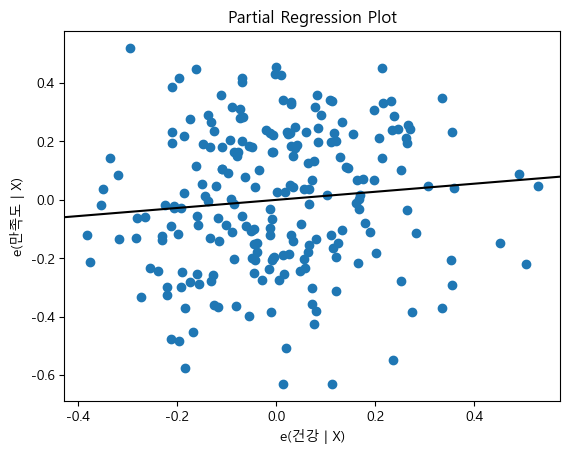

In [147]:
sm.graphics.plot_partregress("만족도", "건강", list(data.columns.difference(["만족도", "건강"])), data=data, ret_coords=True, obs_labels=False)

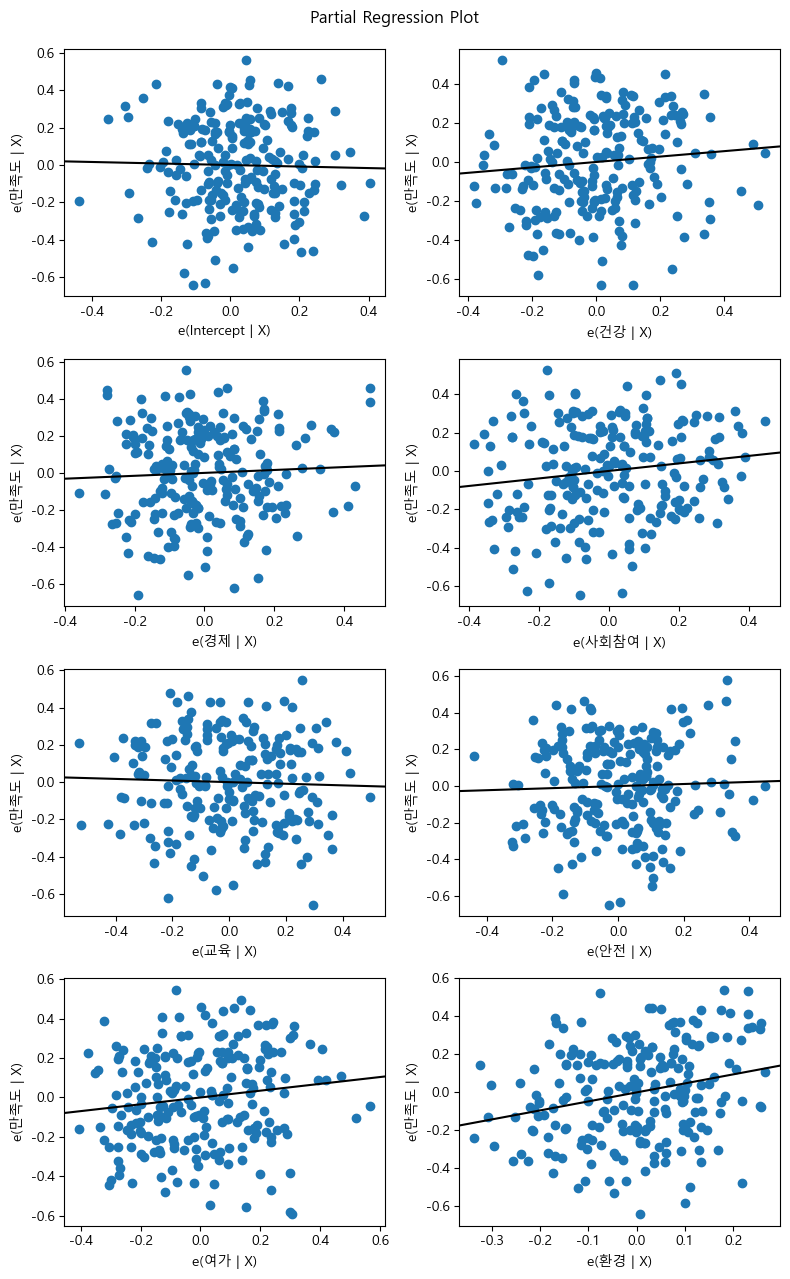

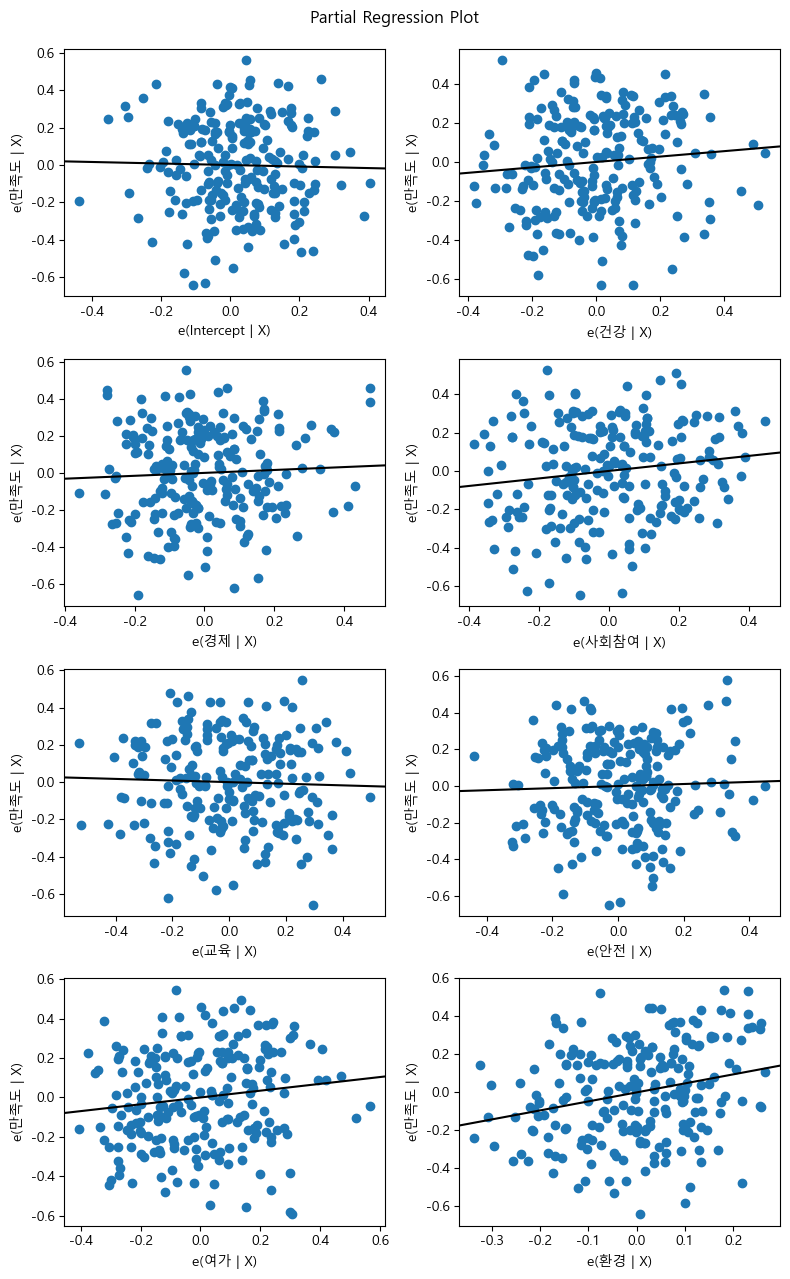

In [155]:
sm.graphics.plot_partregress_grid(regression_result, fig=plt.figure(figsize=(8, 13)))

In [156]:
corr = data.corr()
corr

,만족도,건강,경제,사회참여,교육,안전,여가,환경
만족도,1.000000,0.030889,-0.159564,0.165182,-0.095661,0.175283,0.275589,0.357748
건강,0.030889,1.000000,0.118797,-0.054158,0.063818,0.090740,-0.186737,-0.112172
경제,-0.159564,0.118797,1.000000,0.163335,0.302246,-0.129147,-0.247433,-0.630315
사회참여,0.165182,-0.054158,0.163335,1.000000,0.295712,-0.118827,0.070937,0.059245
교육,-0.095661,0.063818,0.302246,0.295712,1.000000,-0.396170,-0.213909,-0.241198
안전,0.175283,0.090740,-0.129147,-0.118827,-0.396170,1.000000,0.414465,0.233188
여가,0.275589,-0.186737,-0.247433,0.070937,-0.213909,0.414465,1.000000,0.386590
환경,0.357748,-0.112172,-0.630315,0.059245,-0.241198,0.233188,0.386590,1.000000


<Axes: >

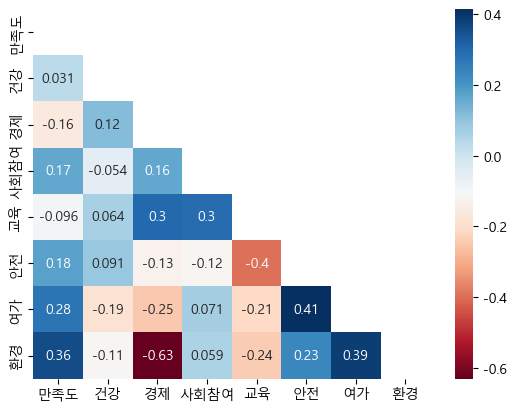

In [159]:
sns.heatmap(corr, mask=np.triu(corr), annot=True, cmap="RdBu")